# Projeto 01: Reconhecimento de Dígitos

### João Victor Soares Silva | Mat: 20210027300
### Yhasmim de Souza Tigre | Mat: 20210026966 

## Pré-Processamento

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
N = 28 #Número de linhas e colunas das matrizes das imagens
P_MAX = 255 #Número máximo de um pixel

In [3]:
# Aqui é só um exemplo menor de como funcionam as fórmulas da simetria no array.
# Acho bom usar pra estudar pra apresentação, então deixei aqui.

# teste = [
# 1, 2, 3, 4,
# 5, 6, 7, 8,
# 9, 10, 11, 12,
# 13, 14, 15, 16]

# lin = 4

# #Vertical
# print('Vertical')
# for i in range(lin):

#     for j in range(int(lin/2)):
#         print(f'{teste[(lin*i) + j]} + {teste[(lin*i) + (lin - j - 1)]} = {teste[(lin*i) + j] + teste[(lin*i) + (lin - j - 1)]}')

# #Horizontal
# print('\nHorizontal')
# for i in range(int(lin/2)):
    
#     for j in range(lin):
#         print(f'{teste[(lin*i) + j]} + {teste[(lin*(lin - i - 1)) + j]} = {teste[(lin*i) + j] + teste[(lin*(lin - i - 1)) + j]}')

In [4]:
def reduzir (nome : str, arq : str) -> None:
    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas
    lista_y = []
    lista_intensidade = []
    lista_simetria_vertical = []
    lista_simetria_horizontal = []
    lista_simetria = []

    for i in range (len(aux)): #Salvando as labels
        lista_y.append (int(aux[i][0]))
    
    aux = np.delete (aux, 0, 1) #Removendo as labels
    
    for i in range (len(aux)): #Calculando as intensidades
        soma = 0

        for j in range (len(aux[0])):
            soma += int(aux[i][j])
        
        lista_intensidade.append(soma/P_MAX)
    
    for imagem in aux: #Simetria vertical
        soma = 0

        for i in range(N):
            for j in range(int(N/2)):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[(N*i) + (N - j - 1)]))

        lista_simetria_vertical.append(soma/P_MAX)

    for imagem in aux: #Simetria horizontal
        soma = 0

        for i in range(int(N/2)):
            for j in range(N):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[N * (N - i - 1) + j]))

        lista_simetria_horizontal.append(soma/P_MAX)
    
    for i in range (len(aux)): #Somando as simetrias
        lista_simetria.append(lista_simetria_vertical[i] + lista_simetria_horizontal[i])

    #Criando e preenchendo o novo .csv
    dados_redux = open (f'{nome}.csv', 'w')

    dados_redux.write ('label;intensidade;simetria\n')
    for i in range (len(aux)):
        dados_redux.write (f'{lista_y[i]};{lista_intensidade[i]};{lista_simetria[i]}\n')
    
    dados_redux.close()

    return

In [5]:
def leitor_csv (arq : str) -> np.array:
    x = []
    y = []

    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas

    for linha in aux:
        x.append([float(linha[1]), float(linha[2])])
        y.append(int(linha[0]))
    
    return np.array(x), np.array(y)

In [6]:
#Reduzindo as dimensões:

reduzir(nome = 'train_redu', arq = 'train.csv')
reduzir(nome = 'test_redu', arq = 'test.csv')

In [7]:
#Separando as amostras:

X_train, y_train = leitor_csv (arq = "train_redu.csv")
X_test, y_test = leitor_csv (arq = "test_redu.csv")

## Algoritmos

### Funções Auxiliares

In [8]:
def mod_labels (X : np.array, Y : np.array, labels : list) -> np.array:
    if (len(labels) != 2):
        print("Selecione as duas labels que deverão ser classificadas.")

        return None

    novo_X = []
    novo_Y = []

    for i in range (len(Y)):
        if (Y[i] == labels[0]):
            novo_X.append(X[i])
            novo_Y.append(1)
        
        elif (Y[i] == labels[1]):
            novo_X.append(X[i])
            novo_Y.append(-1)
    
    return np.array(novo_X), np.array(novo_Y)

In [75]:
def plot_alg (w_lista : np.array) -> None:
    digitos_df = pd.read_csv("test_redu.csv", sep = ";")
    sns.set_theme()
    sns.jointplot(data = digitos_df, x = "intensidade", y = "simetria", hue = "label", palette = "Set2")

    linha = np.linspace(30, 180, 100) 

    for w in w_lista:
        plt.plot(linha, (-w[0] - w[1]*linha) / w[2], c = 'lightseagreen')
    
    plt.ylim(30, 180)
    plt.xlim(30, 180)
    plt.show()

    return

### Perceptron Learning Algorithm (PLA)

In [9]:
class PLA ():
    def __init__(self, n_int : int = 1000) -> None:
        self.n_int = n_int

    def acuracia (self, X : np.array, Y : np.array, w_lista : np.array) -> float:
        lista_x = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
        soma_PCC = 0

        for i in range (len(X)):
            aux = np.sign(np.matmul(w_lista, lista_x[i]))

            if (aux == Y[i]):
                soma_PCC += 1
    
        return (soma_PCC/len(X))
    
    def __construtor_PCI (self, X : np.array, Y : np.array) -> np.array:
        lista_x = np.concatenate((np.ones((len(X), 1)), X), axis = 1)

        lista_PCI_x = []
        lista_PCI_y = []

        for i in range (len(X)):
            aux = np.sign(np.matmul(self.w_lista, lista_x[i]))

            if (aux != Y[i]):
                lista_PCI_x.append(lista_x[i])
                lista_PCI_y.append(Y[i])
        
        return np.array(lista_PCI_x), np.array(lista_PCI_y) 

    def fit (self, X : np.array, Y : np.array) -> None:
        lista_PCI_x = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
        lista_PCI_y = Y
        self.w_lista = np.zeros(lista_PCI_x.shape[1])
        w_otimo = self.w_lista

        i = 0
        while (len(lista_PCI_x) > 0) and (i < self.n_int):
            ale_index = np.random.randint(0, len(lista_PCI_x)) #index aleatório
            ponto_x = lista_PCI_x[ale_index]
            ponto_y = lista_PCI_y[ale_index]
            
            aux = ponto_x * ponto_y
            w_novo = np.add(self.w_lista, aux)

            if (self.acuracia (X, Y, w_otimo) < self.acuracia (X, Y, w_novo)):
                w_otimo = w_novo

            self.w_lista = w_novo

            lista_PCI_x, lista_PCI_y = self.__construtor_PCI (X = X, Y = Y)
            i += 1
        
        self.w_lista = w_otimo

        return
    
    def predict (self, X : np.array) -> np.array:
        lista_x = np.concatenate((np.ones((len(X), 1)), X), axis = 1)
        predict_y = [np.sign(np.matmul(i, self.w_lista)) for i in lista_x]

        return predict_y

    def get_w (self) -> np.array:
        try:
            return self.w_lista
        
        except:
            print ("Não foi possível recuperar w. Por favor, se certifique de treinar o modelo antes.\n")

    def set_w (self, novo_w : np.array) -> None:
        self.w_lista = novo_w

    

### Regressão Linear

### Regressão Logística

In [10]:
class Reg_Log ():
    def __init__ (self, eta = 0.1, n_int = 1000, tam_batch = 32) -> None:
        self.eta = eta
        self.n_int = n_int
        self.tam_batch = tam_batch

    def acuracia (self, X : np.array, Y : np.array) -> float:
        y_predict = self.predict(X = X)
        soma_PCC = 0

        for i in range (len(Y)):
            if (Y[i] == y_predict[i]):
                soma_PCC += 1
            
        return (soma_PCC/len(Y))
    
    def fit (self, X : np.array, Y : np.array, eps : float = 0.0001) -> None:
        lista_X = np.concatenate((np.ones((len(X), 1)), X), axis = 1) #O 1 será usado para a multiplicação com o bias posteriormente
        lista_y = Y
        
        n_dim = len(lista_X[0])
        n_elem = len(lista_X)
        w_lista = np.zeros(n_dim, dtype = float)

        #Cálculo dos gradientes pelo processo iterativo
        for i in range (self.n_int):
            vsoma = np.zeros(n_dim, dtype = 'float64')

            if (self.tam_batch) < n_elem:
                batch_X = []
                batch_Y = []
                indices = rd.sample(range(n_elem), self.tam_batch)

                for j in indices:
                    batch_X.append(lista_X[j])
                    batch_Y.append(lista_y[j])
            
            else:
                batch_X = lista_X
                batch_Y = lista_y
            
            for xn, yn in zip(batch_X, batch_Y):
                aux = np.matmul(np.transpose(yn * w_lista), xn, dtype = "float64")
                vsoma += (yn * xn) / (1 + np.exp(aux, dtype = "float64"))
            
            grad_t = (-1 / self.tam_batch) * vsoma

            #Testando o minimo
            if (np.linalg.norm(grad_t) <  eps):
                break

            w_lista = w_lista - (self.eta * grad_t)
        
        self.w_lista = w_lista

    def predict (self, X : np.array) -> np.array:
        lista_X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)

        aux = [1 / (1 + np.exp(- np.matmul(np.transpose(self.w_lista), i))) for i in lista_X]
        predict_y = [1 if i >= 0.5 else -1 for i in aux]

        return predict_y

    def get_w (self) -> np.array:
        try:
            return self.w_lista
        
        except:
            print ("Não foi possível recuperar w. Por favor, se certifique de treinar o modelo antes.\n")

    def set_w (self, novo_w : np.array) -> None:
        self.w_lista = novo_w

## Classificação dos Dígitos 1x5

In [11]:
#Instanciando:

X_train_1x5, y_train_1x5 = mod_labels (X = X_train, Y = y_train, labels = [1, 5])
X_test_1x5, y_test_1x5 = mod_labels (X = X_test, Y = y_test, labels = [1, 5])

### Perceptron Learning Algorithm (PLA)

In [31]:
#Instanciando o objeto:
PLA_1x5 = PLA (n_int = 20000)

#Treinando:
PLA_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
PLA_w_1x5 = PLA_1x5.get_w()

#Observando os resultados:
print(PLA_1x5.acuracia(X = X_test_1x5, Y = y_test_1x5, w_lista = PLA_w_1x5))

1.0


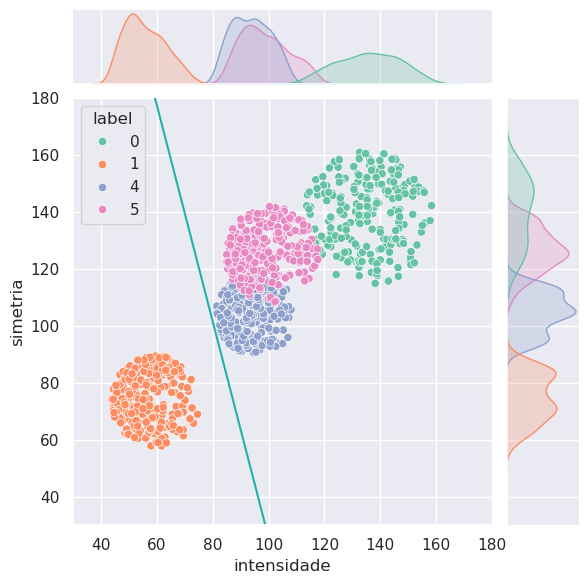

In [77]:
plot_alg (w_lista = [PLA_w_1x5])

### Regressão Linear

### Regressão Logística

In [25]:
#Instanciando o objeto:
Rlog_1x5 = Reg_Log (n_int = 60000, tam_batch = 350)

#Treinando:
Rlog_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlog_w_1x5 = PLA_1x5.get_w()

#Observando os resultados:
print(Rlog_1x5.acuracia(X = X_test_1x5, Y = y_test_1x5))

/tmp/ipykernel_23397/3715268824.py:44: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp(aux, dtype = "float64"))


1.0


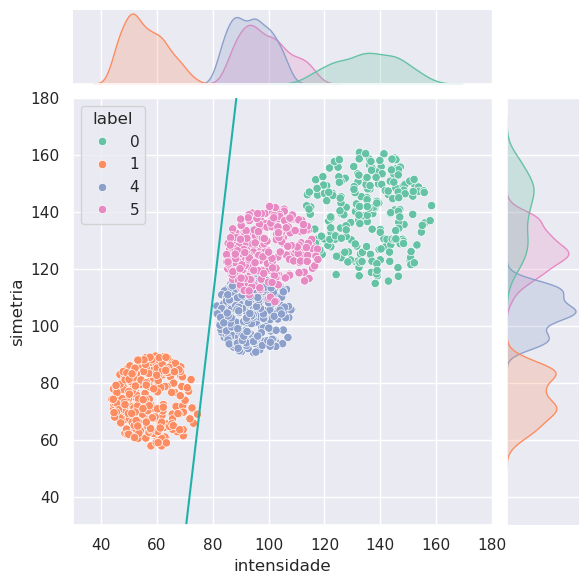

In [78]:
plot_alg (w_lista = [Rlog_w_1x5])

### Relatório de Eficácia

## Classificação de Dígitos Completo

In [26]:
class UmVSTodos ():
    def __init__ (self, ordem : list, n_int : int = 1000, modelo = None) -> None:
        self.modelo = modelo(n_int = n_int)
        self.ordem = ordem
        
    def fit (self, X : np.array, Y : np.array) -> None:
        novo_X = X
        novo_Y = Y
        fila = self.ordem
        self.w_lista = []

        while (len(fila) > 0):
            aux = []
            index_lista = []

            #Adequando as labels
            for i in range(len(novo_Y)):
                if (novo_Y[i] == fila[0]):
                    aux.append(1)
                    index_lista.append(i)
                
                else:
                    aux.append(-1)
            
            #Treinando os pesos de acordo com o modelo
            novo_Y = aux
            self.modelo.fit(X = novo_X, Y = novo_Y)
            self.w_lista.append(self.modelo.get_w())

            #Atualizando as listas, removendo as labels já treinadas
            novo_X = np.delete (novo_X, index_lista)
            novo_Y = np.delete (novo_Y, index_lista)
            fila.remove(fila[0])

        return

    def predict (self, X : np.array) -> np.array:
        y_predict = [self.__predict_x(x = xi) for xi in X]

        return y_predict

    def __predict_x (self, x : np.array) -> int:
        for i in range (len(self.ordem), 0, -1):
            aux = self.modelo
            aux.set_w(novo_w = self.w_lista[-(i - 1)])

            if (aux.predict(X = x)[0] == 1):
                return self.ordem[-i]
            
        else:
            return self.__predict_x (x = x)

### Perceptron Learning Algorithm (PLA)

### Regressão Linear

### Regressão Logística

### Relatório de Eficácia

## Comparação dos Classificadores

## Implementações Avançadas

### Weight-Decay para a Regressão Logística

### Definindo a Melhor Ordem